Устанавливаем нужные библиотеки, если по умолчанию jupyter не подхватывает их. 

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv(r'C:\Users\Danch\PycharmProjects\big_data_analysis_HSE\HW_1_2025_Данила_Липатов\data\HW1_var_14.csv', sep=';', encoding='utf-8')
print(f"Размерность данных: {df.shape}")
print(f"Количество клиентов: {df['ID'].nunique()}")

Размерность данных: (10242, 44)
Количество клиентов: 10242


В моем варианте (14) представлено 10242 записи с кол-вом колонок - 44. Выведем, что это за колонки: 


In [205]:
df.dtypes

Номер варианта             int64
ID                         int64
INCOME_BASE_TYPE          object
CREDIT_PURPOSE            object
INSURANCE_FLAG           float64
DTI                      float64
SEX                       object
FULL_AGE_CHILD_NUMBER      int64
DEPENDANT_NUMBER           int64
EDUCATION                 object
EMPL_TYPE                 object
EMPL_SIZE                 object
BANKACCOUNT_FLAG         float64
Period_at_work           float64
age                      float64
EMPL_PROPERTY             object
EMPL_FORM                 object
FAMILY_STATUS             object
max90days                float64
max60days                float64
max30days                float64
max21days                float64
max14days                float64
avg_num_delay            float64
if_zalog                 float64
num_AccountActive180     float64
num_AccountActive90      float64
num_AccountActive60      float64
Active_to_All_prc        float64
numAccountActiveAll      float64
numAccount

 Сразу удалим переменную "Номер варианта" и выведем 5 первых строк

In [206]:
df = df.drop(columns=["Номер варианта"])
df.head(5)

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000014,Форма банка (без печати работодателя),Ремонт,1.0,0.48,женский,1,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000034,2НДФЛ,Другое,0.0,0.59,мужской,1,0,высшее,специалист,...,0.0,5.0,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000054,Форма банка (без печати работодателя),Ремонт,0.0,0.20,женский,0,0,среднее-специальное,специалист,...,1.0,7.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000074,Поступление зарплаты на счет,Ремонт,1.0,0.43,мужской,1,0,высшее,специалист,...,1.0,4.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000094,2НДФЛ,Покупка автомобиля,0.0,0.57,женский,0,0,высшее,специалист,...,0.0,3.0,86.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


Видны сразу же пропуски в значениях, но, сперва, посмотрим визуально на кол-во числовых / категориальных фичей: 

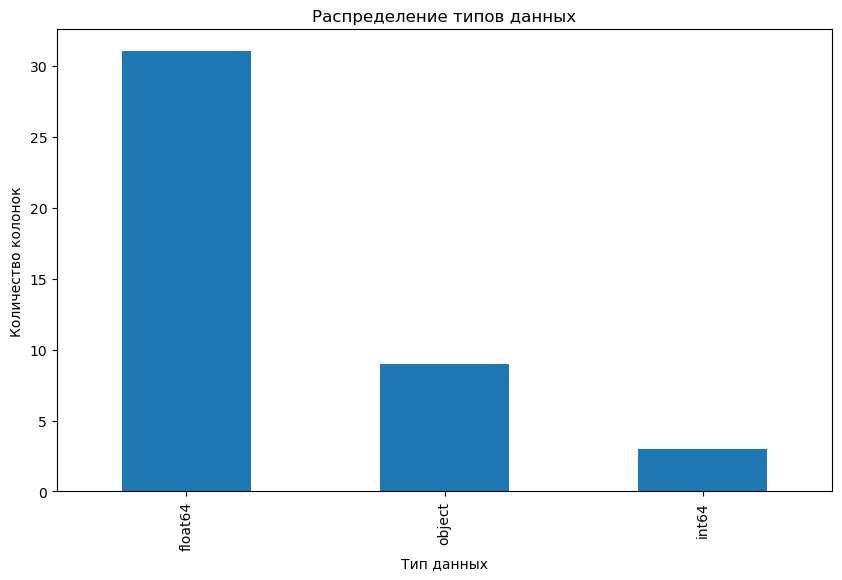

In [207]:
# Подсчет колонок по типам
type_counts = df.dtypes.value_counts()

plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Распределение типов данных')
plt.xlabel('Тип данных')
plt.ylabel('Количество колонок')
plt.show()

Доминирует тип - float, меньше всего целочисленных значений, категориальных - чуть меньше 10 (по подсчетам - 9) 

In [208]:
missing_data = pd.DataFrame({
    'Тип данных': df.dtypes,
    'Уникальные значения': df.nunique(),
    'Пропущенные значения': df.isnull().sum(),
    'Доля пропусков (%)': round(df.isnull().sum() / len(df) * 100, 2),
    'Нулевые значения': (df == 0).sum(),
    'Доля пустых значений %': round((df == 0).sum() / len(df) * 100, 2),
    'Пустые строки': (df == '').sum()
})

print(missing_data.sort_values('Доля пропусков (%)', ascending=False))

                      Тип данных  Уникальные значения  Пропущенные значения  \
avg_num_delay            float64                 1142                  6589   
ninety_vintage           float64                    2                  6577   
Active_not_cc            float64                    8                  6577   
num_AccountActive180     float64                    6                  6577   
num_AccountActive90      float64                    5                  6577   
num_AccountActive60      float64                    4                  6577   
Active_to_All_prc        float64                   97                  6577   
numAccountActiveAll      float64                   13                  6577   
numAccountClosed         float64                   25                  6577   
sum_of_paym_months       float64                  320                  6577   
all_credits              float64                   30                  6577   
own_closed               float64                   1

ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ
                               mean           std        min           50%  \
ID                     1.102424e+06  59135.101251  1000014.0  1.102424e+06   
INSURANCE_FLAG         6.101562e-01      0.487738        0.0  1.000000e+00   
DTI                    3.856150e-01      0.136346        0.0  4.000000e-01   
FULL_AGE_CHILD_NUMBER  5.726421e-01      0.806940        0.0  0.000000e+00   
DEPENDANT_NUMBER       4.198399e-03      0.073164        0.0  0.000000e+00   
BANKACCOUNT_FLAG       3.870189e-01      0.876795        0.0  0.000000e+00   
Period_at_work         6.452267e+01     65.088238        4.0  4.300000e+01   
age                    3.605982e+01      8.604664       23.0  3.400000e+01   
max90days              1.646485e+00      2.023144        0.0  1.000000e+00   
max60days              1.177270e+00      1.638993        0.0  1.000000e+00   
max30days              8.773730e-01      1.404508        0.0  0.000000e+00   
max21days            

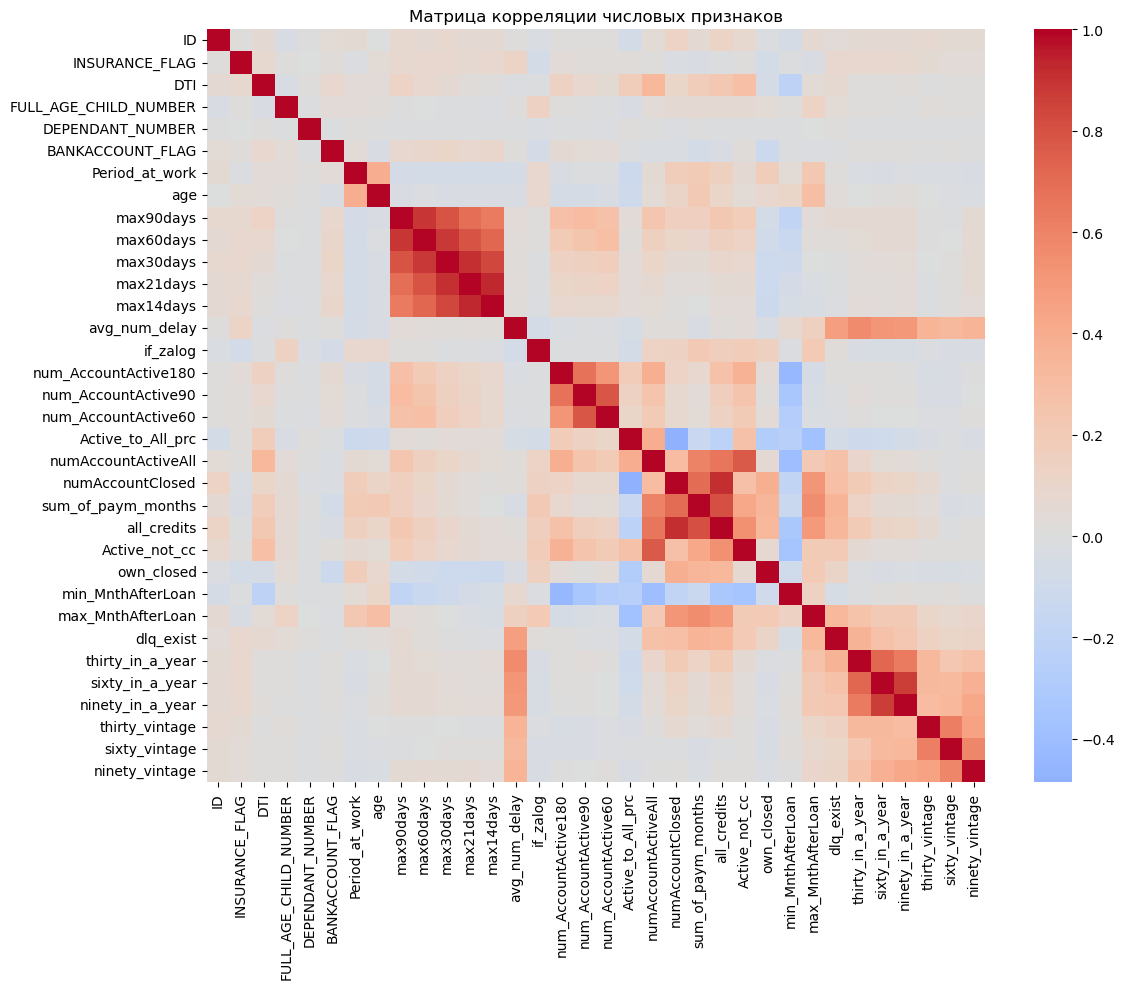

In [209]:
# Описательная статистика для числовых признаков
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ")
print(df[numeric_cols].describe().T[['mean', 'std', 'min', '50%', 'max']])

# Корреляционный анализ
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Матрица корреляции числовых признаков')
plt.tight_layout()
plt.show()

Имеется довольная сильная связь у бинарных (по описанию) фичей и у max_n_days - видимо, они включают информацию друг по другу

АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

INCOME_BASE_TYPE:
Количество уникальных значений: 4
Топ-5 значений:
INCOME_BASE_TYPE
2НДФЛ                                     3217
Поступление зарплаты на счет              3064
Форма банка (без печати работодателя)     2957
Свободная форма с печатью работодателя     936
Name: count, dtype: int64
Доля пропусков: 0.66%

CREDIT_PURPOSE:
Количество уникальных значений: 10
Топ-5 значений:
CREDIT_PURPOSE
Ремонт                                 5589
Покупка автомобиля                     1784
Покупка недвижимости/ строительство    1443
Отпуск                                  361
Другое                                  328
Name: count, dtype: int64
Доля пропусков: 0.0%

SEX:
Количество уникальных значений: 2
Топ-5 значений:
SEX
мужской    5682
женский    4560
Name: count, dtype: int64
Доля пропусков: 0.0%

EDUCATION:
Количество уникальных значений: 9
Топ-5 значений:
EDUCATION
высшее                                 5765
среднее-специальное                    17

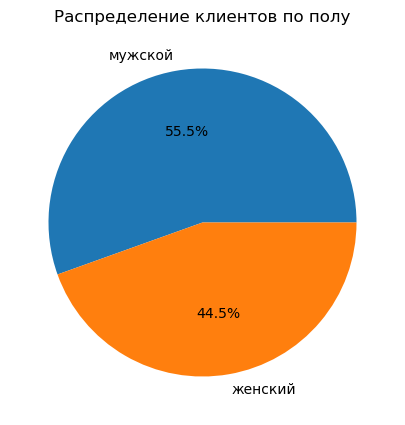

In [210]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("АНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print(f"Топ-5 значений:")
    print(df[col].value_counts().head())
    print(f"Доля пропусков: {round(df[col].isnull().sum() / len(df) * 100, 2)}%")

plt.figure(figsize=(10, 5))
if 'SEX' in df.columns:
    sex_distribution = df['SEX'].value_counts()
    plt.pie(sex_distribution.values, labels=sex_distribution.index, autopct='%1.1f%%')
    plt.title('Распределение клиентов по полу')
    plt.show()

В данных слегка доминирует мужской пол, но не так сильно

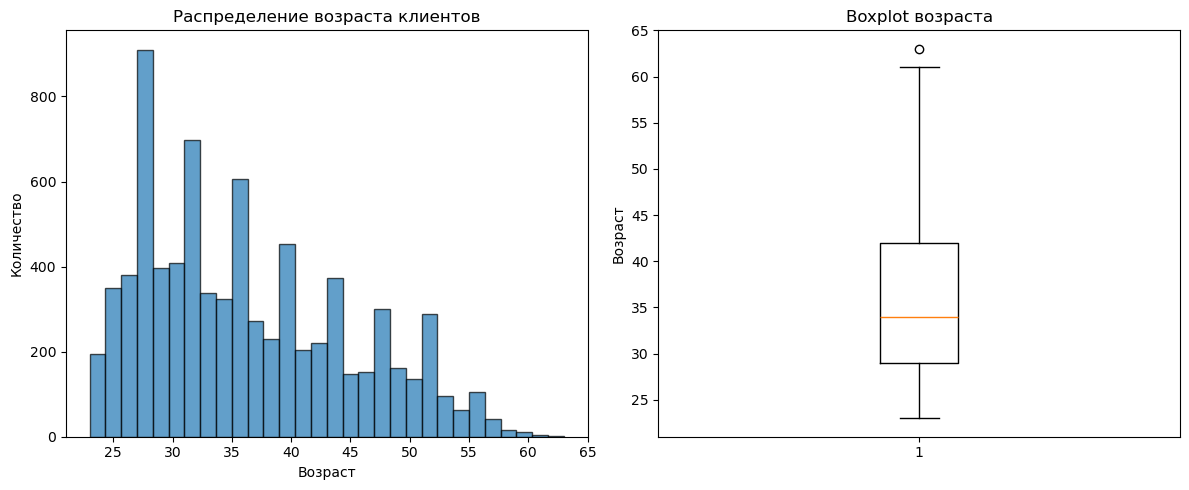

СТАТИСТИКА ПО ВОЗРАСТУ
Средний возраст: 36.06
Медианный возраст: 34.00
Минимальный возраст: 23.00
Максимальный возраст: 63.00
Стандартное отклонение: 8.60


In [211]:
# Анализ распределения возраста

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['age'].dropna(), bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
plt.boxplot(df['age'].dropna())
plt.title('Boxplot возраста')
plt.ylabel('Возраст')

plt.tight_layout()
plt.show()

print("СТАТИСТИКА ПО ВОЗРАСТУ")
print(f"Средний возраст: {df['age'].mean():.2f}")
print(f"Медианный возраст: {df['age'].median():.2f}")
print(f"Минимальный возраст: {df['age'].min():.2f}")
print(f"Максимальный возраст: {df['age'].max():.2f}")
print(f"Стандартное отклонение: {df['age'].std():.2f}")

Распределение возраста клиентов показывает, что большинство клиентов находятся в возрастном диапазоне 25-45 лет. Есть небольшое количество клиентов старшего возраста. Распределение приближается к нормальному

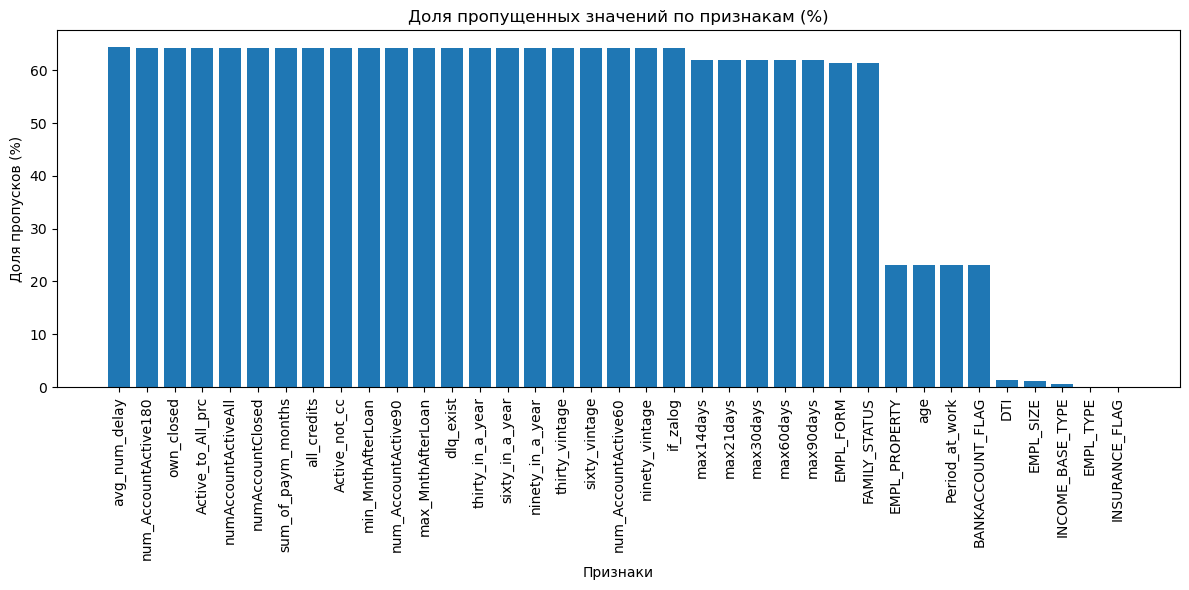

In [212]:
plt.figure(figsize=(12, 6))
missing_percent = df.isnull().sum() / len(df) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
plt.bar(missing_percent.index, missing_percent.values)
plt.title('Доля пропущенных значений по признакам (%)')
plt.xlabel('Признаки')
plt.ylabel('Доля пропусков (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

В большей части фичей доля пропущенных значений стримится к 60 %, их предстоит достаточно серьезно обрабатывать.

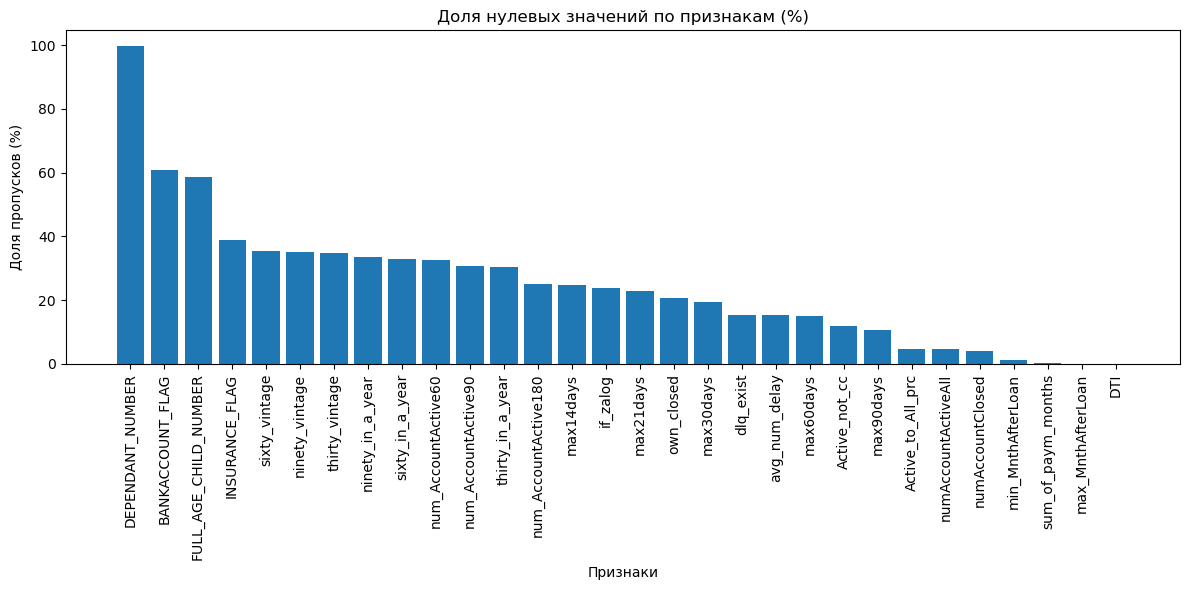

In [213]:
# Визуализация пропущенных значений
plt.figure(figsize=(12, 6))
missing_percent = round((df == 0).sum() / len(df) * 100, 2)
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
plt.bar(missing_percent.index, missing_percent.values)
plt.title('Доля нулевых значений по признакам (%)')
plt.xlabel('Признаки')
plt.ylabel('Доля пропусков (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Из данного распределения долей нулевых значений сразу интересует фича DEPENDANT_NUMBER - где доля стримится к 100 % и на уровне 60 % держатся две фичи - BANKACCOUNT_FLAG, FULL_AGE_CHILD_NUMBER. Разберем их подробнее: 


DEPENDANT_NUMBER

Кол-во уникальных значений и сами значения:  3 [0 1 2]


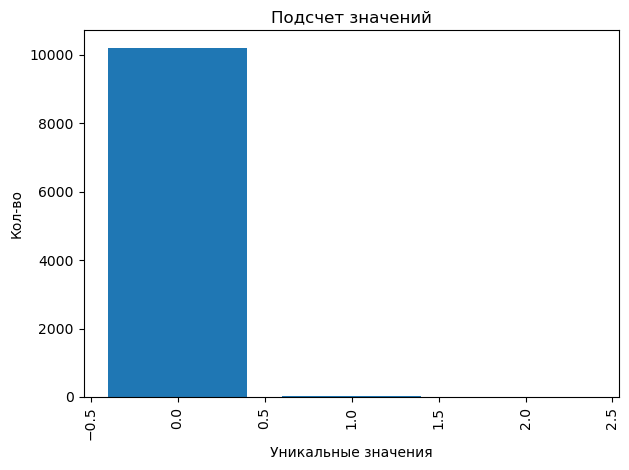

In [214]:
print("Кол-во уникальных значений и сами значения: ", len(df["DEPENDANT_NUMBER"].unique()), df["DEPENDANT_NUMBER"].unique())
values_count = df["DEPENDANT_NUMBER"].value_counts()
plt.bar(df["DEPENDANT_NUMBER"].unique(), values_count)
plt.title("Подсчет значений")
plt.xlabel("Уникальные значения")
plt.ylabel('Кол-во')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

BANKACCOUNT_FLAG (заменили NaN нда -1 для подсчета и визуализации временно)

Кол-во уникальных значений и сами значения:  6 [ 0.  3.  1. nan  2.  4.]


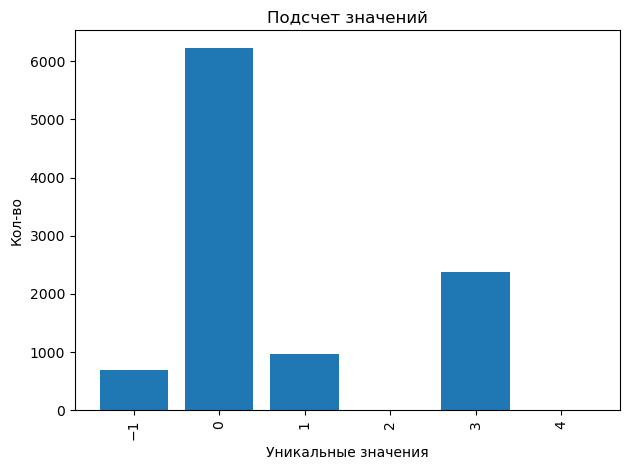

In [215]:
print("Кол-во уникальных значений и сами значения: ", len(df["BANKACCOUNT_FLAG"].unique()), df["BANKACCOUNT_FLAG"].unique())
values_count = df["BANKACCOUNT_FLAG"].fillna(-1).value_counts()
plt.bar(df["BANKACCOUNT_FLAG"].fillna(-1).unique(), values_count)
plt.title("Подсчет значений")
plt.xlabel("Уникальные значения")
plt.ylabel('Кол-во')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

FULL_AGE_CHILD_NUMBER

Кол-во уникальных значений и сами значения:  9 [ 1  0  2  3  5  4  6 21  8]


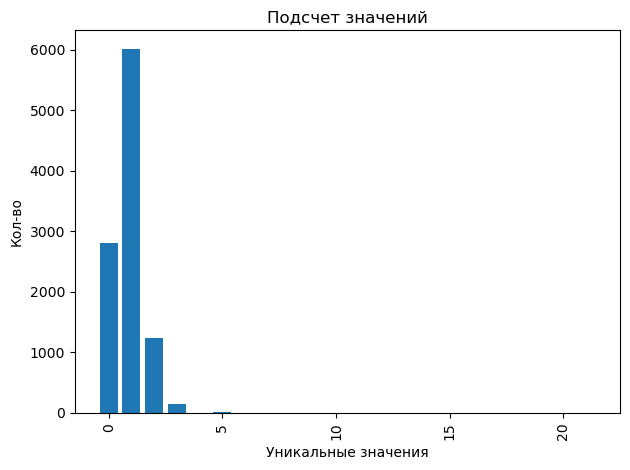

In [216]:
print("Кол-во уникальных значений и сами значения: ", len(df["FULL_AGE_CHILD_NUMBER"].unique()), df["FULL_AGE_CHILD_NUMBER"].unique())
values_count = df["FULL_AGE_CHILD_NUMBER"].value_counts()
plt.bar(df["FULL_AGE_CHILD_NUMBER"].unique(), values_count)
plt.title("Подсчет значений")
plt.xlabel("Уникальные значения")
plt.ylabel('Кол-во')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Исходя из первичной обработки этих переменных можно сказать, что в них все нормально и это важные показатели, которые, скорее всего, будут влиять на кластеризацию в дальнейшем, так как там доминирующие значения относятся либо к категориям (как в случае с BANKACCOUNT_FLAG)

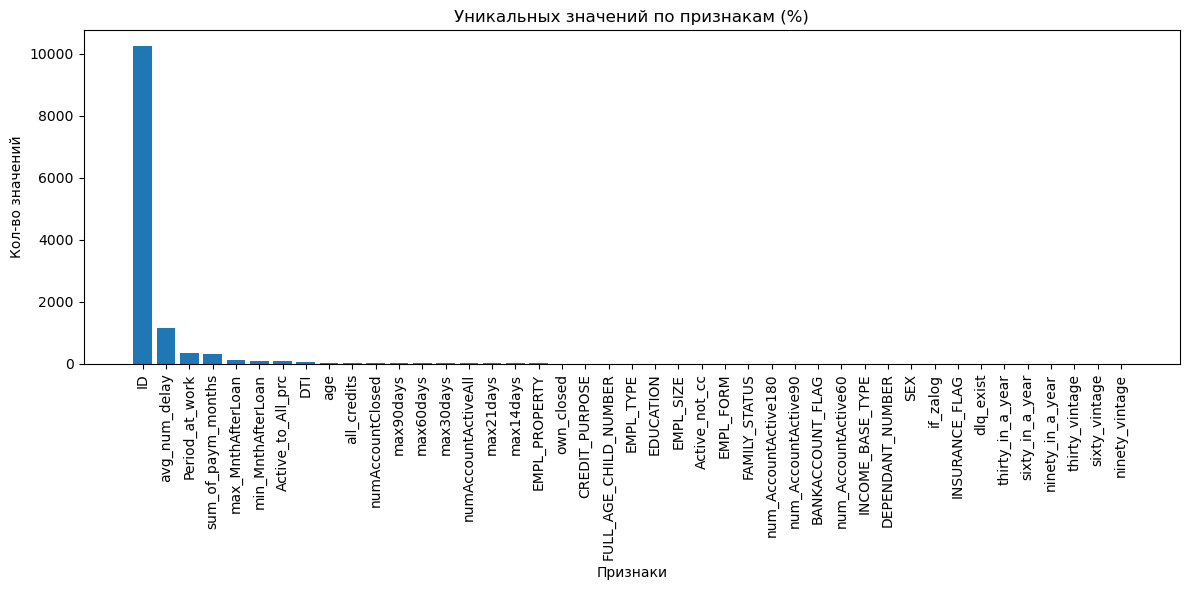

In [217]:
plt.figure(figsize=(12, 6))
missing_percent = df.nunique()
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
plt.bar(missing_percent.index, missing_percent.values)
plt.title('Уникальных значений по признакам (%)')
plt.xlabel('Признаки')
plt.ylabel('Кол-во значений')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Больше всего - уникальных ID - неудивительно, дальше идет резкий скачок вниз и значения +- везде имеют одинаковое значения (скорее всего, как в тех фичах, что рассматривались ранее)

Теперь быстро пройдемся по категориальным фичам, возможно, там есть спец символы, которые обозначают пропуск и тд


In [218]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
print(f"Колонки с типом object ({len(object_columns)}):")
print(object_columns)

Колонки с типом object (9):
['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']


In [219]:
for col in object_columns:
    print(col, df[col].unique(), sep='\n')

INCOME_BASE_TYPE
['Форма банка (без печати работодателя)' '2НДФЛ'
 'Поступление зарплаты на счет' 'Свободная форма с печатью работодателя'
 nan]
CREDIT_PURPOSE
['Ремонт' 'Другое' 'Покупка автомобиля'
 'Покупка недвижимости/ строительство' 'Покупка мебели' 'Лечение' 'Отпуск'
 'Обучение' 'Покупка земли' 'Покупка бытовой техники']
SEX
['женский' 'мужской']
EDUCATION
['высшее' 'среднее-специальное' '*n.a.*'
 'Высшее/Второе высшее/Ученая степень' 'среднее' 'незаконченное высшее'
 'второе высшее' 'ученая степень' 'Неполное среднее']
EMPL_TYPE
['специалист' 'менеджер высшего звена' 'вспомогательный персонал'
 'менеджер среднего звена' 'торговый представитель' 'другое' 'рабочий'
 'менеджер по продажам' 'страховой агент' nan]
EMPL_SIZE
['>250' '< 50' '>=200' '>=150' nan '>=50' '>100' '>=100' '*n.a.*']
EMPL_PROPERTY
['Транспорт' 'Информационные технологии' 'Торговля' 'Другое' nan
 'Производство' 'Строительство' 'Финансы' 'Наука' 'Государственная служба'
 'Туризм' 'Сельское и лесное хозяйство' 'Ю

Да, помимо базового NaN в категориальных данных вылезло новое значение - '*n.a.*' . Переведем его в простой NaN для удобства

In [220]:
for col in object_columns:
    df[col] = df[col].replace('*n.a.*', np.nan)

In [221]:
df["EMPL_SIZE"] = df["EMPL_SIZE"].replace(">100", ">=100")

In [222]:
df["EMPL_SIZE"].unique()

array(['>250', '< 50', '>=200', '>=150', nan, '>=50', '>=100'],
      dtype=object)

Рассмотрим колонки с наименьшим кол-вом уникальных значений, в них совпадает кол-во пропущенных значений, есть ощущение, что это флаги (бинарные)

In [223]:
# Колонки с ровно 2 уникальными значениями
two_unique_cols = []
for col in df.columns:
    if df[col].nunique(dropna=True) == 2:
        print(col, df[col].unique())
        two_unique_cols.append(col)

print()
print(f"Колонки с 2 уникальными значениями без NaN ({len(two_unique_cols)}):")
print(two_unique_cols)

INSURANCE_FLAG [ 1.  0. nan]
SEX ['женский' 'мужской']
if_zalog [nan  0.  1.]
dlq_exist [nan  0.  1.]
thirty_in_a_year [nan  0.  1.]
sixty_in_a_year [nan  0.  1.]
ninety_in_a_year [nan  0.  1.]
thirty_vintage [nan  0.  1.]
sixty_vintage [nan  0.  1.]
ninety_vintage [nan  0.  1.]

Колонки с 2 уникальными значениями без NaN (10):
['INSURANCE_FLAG', 'SEX', 'if_zalog', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage']


In [224]:
for col in two_unique_cols:
    print(col, len(df[df[col].isnull()]))

INSURANCE_FLAG 2
SEX 0
if_zalog 6577
dlq_exist 6577
thirty_in_a_year 6577
sixty_in_a_year 6577
ninety_in_a_year 6577
thirty_vintage 6577
sixty_vintage 6577
ninety_vintage 6577


Итого получается, что это и правда бинарные значения 0 или 1. С учетом пропущенных значений, который 6577, у нас остается всего 3665 валидных записей. Восстанавливать по ним какие то значения почти нереально, поэтому лучшим решением будет их убрать и 

In [225]:
len(df) - 6577

3665

Так как в целом показатели довольно тесно связаны друг с другом, то можно смело убирать 

In [226]:
columns_to_check = [
    'INSURANCE_FLAG', 'SEX', 'if_zalog', 'dlq_exist', 
    'thirty_in_a_year', 'sixty_in_a_year', 'ninety_in_a_year', 
    'thirty_vintage', 'sixty_vintage', 'ninety_vintage'
]

available_columns = [col for col in columns_to_check if col in df.columns]

# Анализ перед удалением
print("АНАЛИЗ ПРОПУСКОВ ПЕРЕД УДАЛЕНИЕМ:")
print("=" * 50)

for col in available_columns:
    na_count = df[col].isnull().sum()
    na_percent = (na_count / len(df)) * 100
    print(f"{col:25}: {na_count:5} пропусков ({na_percent:6.2f}%)")

mask = df[available_columns].isnull().any(axis=1)
rows_to_drop = mask.sum()
percent_to_drop = (rows_to_drop / len(df)) * 100

df_clean = df.dropna(subset=available_columns)


АНАЛИЗ ПРОПУСКОВ ПЕРЕД УДАЛЕНИЕМ:
INSURANCE_FLAG           :     2 пропусков (  0.02%)
SEX                      :     0 пропусков (  0.00%)
if_zalog                 :  6577 пропусков ( 64.22%)
dlq_exist                :  6577 пропусков ( 64.22%)
thirty_in_a_year         :  6577 пропусков ( 64.22%)
sixty_in_a_year          :  6577 пропусков ( 64.22%)
ninety_in_a_year         :  6577 пропусков ( 64.22%)
thirty_vintage           :  6577 пропусков ( 64.22%)
sixty_vintage            :  6577 пропусков ( 64.22%)
ninety_vintage           :  6577 пропусков ( 64.22%)


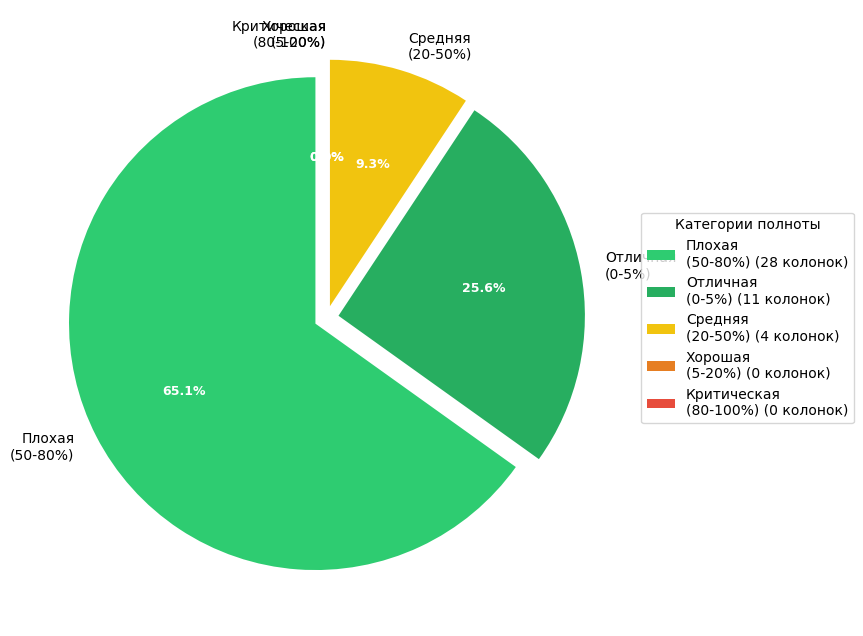

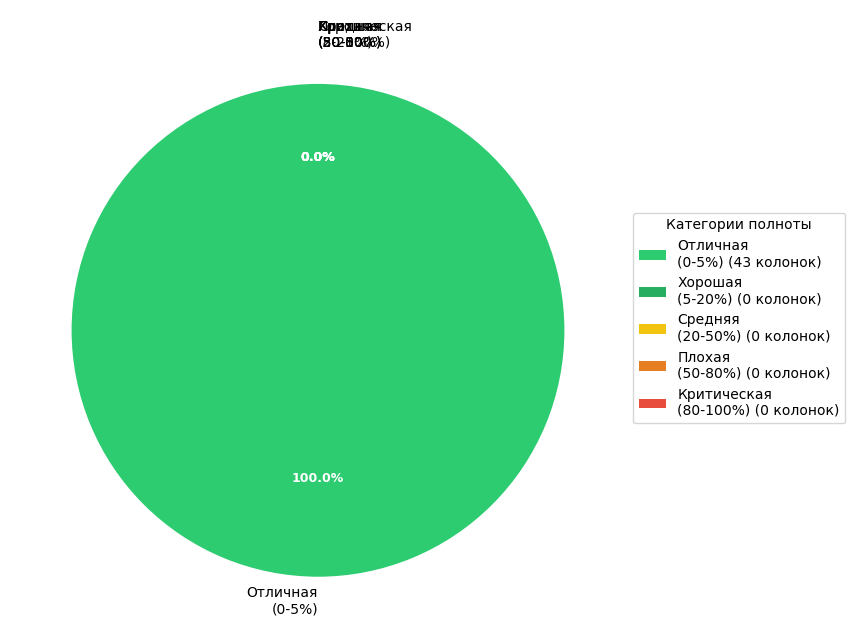

In [227]:
def plot_data_completeness(missing_data, figsize=(10, 8)):
    
    bins = [0, 5, 20, 50, 80, 100]
    labels = ['Отличная\n(0-5%)', 'Хорошая\n(5-20%)', 'Средняя\n(20-50%)', 
              'Плохая\n(50-80%)', 'Критическая\n(80-100%)']

    missing_data['Категория полноты'] = pd.cut(
        missing_data['Доля пропусков (%)'], 
        bins=bins, 
        labels=labels,
        include_lowest=True
    )

    category_counts = missing_data['Категория полноты'].value_counts()

    plt.figure(figsize=figsize)

    colors = ['#2ecc71', '#27ae60', '#f1c40f', '#e67e22', '#e74c3c']

    wedges, texts, autotexts = plt.pie(
        category_counts.values,
        labels=category_counts.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        explode=[0.05] * len(category_counts),
        textprops={'fontsize': 10}
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)
    
    total_cols = len(missing_data)
    perfect_cols = len(missing_data[missing_data['Доля пропусков (%)'] == 0])
    critical_cols = len(missing_data[missing_data['Доля пропусков (%)'] >= 80])
    

    plt.legend(
        wedges,
        [f'{label} ({count} колонок)' for label, count in zip(category_counts.index, category_counts.values)],
        title="Категории полноты",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=10
    )
    
    return missing_data

missing_data_with_categories = plot_data_completeness(missing_data)

missing_data_clean = pd.DataFrame({
    'Тип данных': df_clean.dtypes,
    'Уникальные значения': df_clean.nunique(),
    'Пропущенные значения': df_clean.isnull().sum(),
    'Доля пропусков (%)': round(df_clean.isnull().sum() / len(df_clean) * 100, 2),
    'Нулевые значения': (df_clean == 0).sum(),
    'Доля пустых значений %': round((df_clean == 0).sum() / len(df_clean) * 100, 2),
    'Пустые строки': (df_clean == '').sum()
})
missing_data_with_categories = plot_data_completeness(missing_data_clean)


In [228]:
missing_data_clean

,Тип данных,Уникальные значения,Пропущенные значения,Доля пропусков (%),Нулевые значения,Доля пустых значений %,Пустые строки,Категория полноты
ID,int64,3664,0,0.00,0,0.00,0,Отличная\n(0-5%)
INCOME_BASE_TYPE,object,4,0,0.00,0,0.00,0,Отличная\n(0-5%)
CREDIT_PURPOSE,object,10,0,0.00,0,0.00,0,Отличная\n(0-5%)
INSURANCE_FLAG,float64,2,0,0.00,1371,37.42,0,Отличная\n(0-5%)
DTI,float64,59,0,0.00,2,0.05,0,Отличная\n(0-5%)
SEX,object,2,0,0.00,0,0.00,0,Отличная\n(0-5%)
FULL_AGE_CHILD_NUMBER,int64,8,0,0.00,2184,59.61,0,Отличная\n(0-5%)
DEPENDANT_NUMBER,int64,3,0,0.00,3650,99.62,0,Отличная\n(0-5%)
EDUCATION,object,7,12,0.33,0,0.00,0,Отличная\n(0-5%)
EMPL_TYPE,object,9,0,0.00,0,0.00,0,Отличная\n(0-5%)


Итогов, у нас почти исчезли все пустые значения, категория полноты - почти везде отличная, значит все нулевые значения имеют какой либо важный характер - например, категории и тд. Оставшиеся пустые значения для avg_num_delay заполним средним, а для остальных -1, чтобы не выкидывать)


ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ
                               mean           std        min           50%  \
ID                     1.097726e+06  60423.976158  1000034.0  1.093294e+06   
INSURANCE_FLAG         6.258188e-01      0.483977        0.0  1.000000e+00   
DTI                    3.886900e-01      0.136245        0.0  4.100000e-01   
FULL_AGE_CHILD_NUMBER  5.554039e-01      0.778631        0.0  0.000000e+00   
DEPENDANT_NUMBER       4.639738e-03      0.079104        0.0  0.000000e+00   
BANKACCOUNT_FLAG       3.116812e-01      0.789997        0.0  0.000000e+00   
Period_at_work         5.584716e+01     53.373737        4.0  3.900000e+01   
age                    3.582969e+01      8.352651       23.0  3.400000e+01   
max90days              1.651925e+00      2.063916        0.0  1.000000e+00   
max60days              1.157794e+00      1.666058        0.0  1.000000e+00   
max30days              8.452088e-01      1.424146        0.0  0.000000e+00   
max21days            

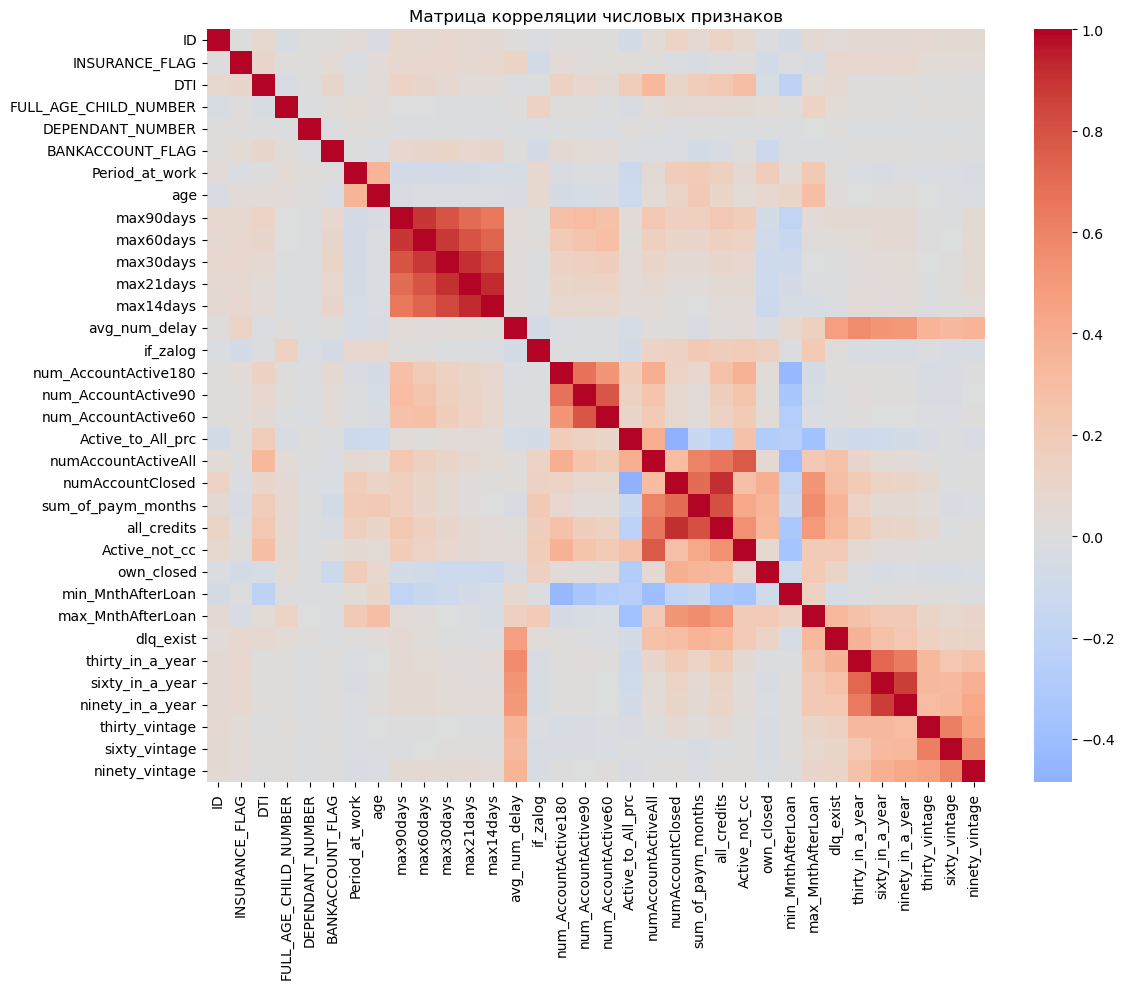

In [229]:
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ")
print(df_clean[numeric_cols].describe().T[['mean', 'std', 'min', '50%', 'max']])

plt.figure(figsize=(12, 10))
correlation_matrix = df_clean[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Матрица корреляции числовых признаков')
plt.tight_layout()
plt.show()

АНАЛИЗ ВЫБРОСОВ
ID: 0 выбросов (0.00%)
INSURANCE_FLAG: 0 выбросов (0.00%)
DTI: 0 выбросов (0.00%)
FULL_AGE_CHILD_NUMBER: 59 выбросов (1.61%)
DEPENDANT_NUMBER: 14 выбросов (0.38%)
BANKACCOUNT_FLAG: 643 выбросов (17.55%)
Period_at_work: 165 выбросов (4.50%)
age: 0 выбросов (0.00%)
max90days: 161 выбросов (4.39%)
max60days: 96 выбросов (2.62%)
max30days: 301 выбросов (8.22%)
max21days: 205 выбросов (5.59%)
max14days: 168 выбросов (4.59%)
avg_num_delay: 381 выбросов (10.40%)
if_zalog: 0 выбросов (0.00%)
num_AccountActive180: 47 выбросов (1.28%)
num_AccountActive90: 522 выбросов (14.25%)
num_AccountActive60: 334 выбросов (9.12%)
Active_to_All_prc: 0 выбросов (0.00%)
numAccountActiveAll: 72 выбросов (1.97%)
numAccountClosed: 95 выбросов (2.59%)
sum_of_paym_months: 153 выбросов (4.18%)
all_credits: 105 выбросов (2.87%)
Active_not_cc: 6 выбросов (0.16%)
own_closed: 252 выбросов (6.88%)
min_MnthAfterLoan: 253 выбросов (6.91%)
max_MnthAfterLoan: 1 выбросов (0.03%)
dlq_exist: 0 выбросов (0.00%)
t

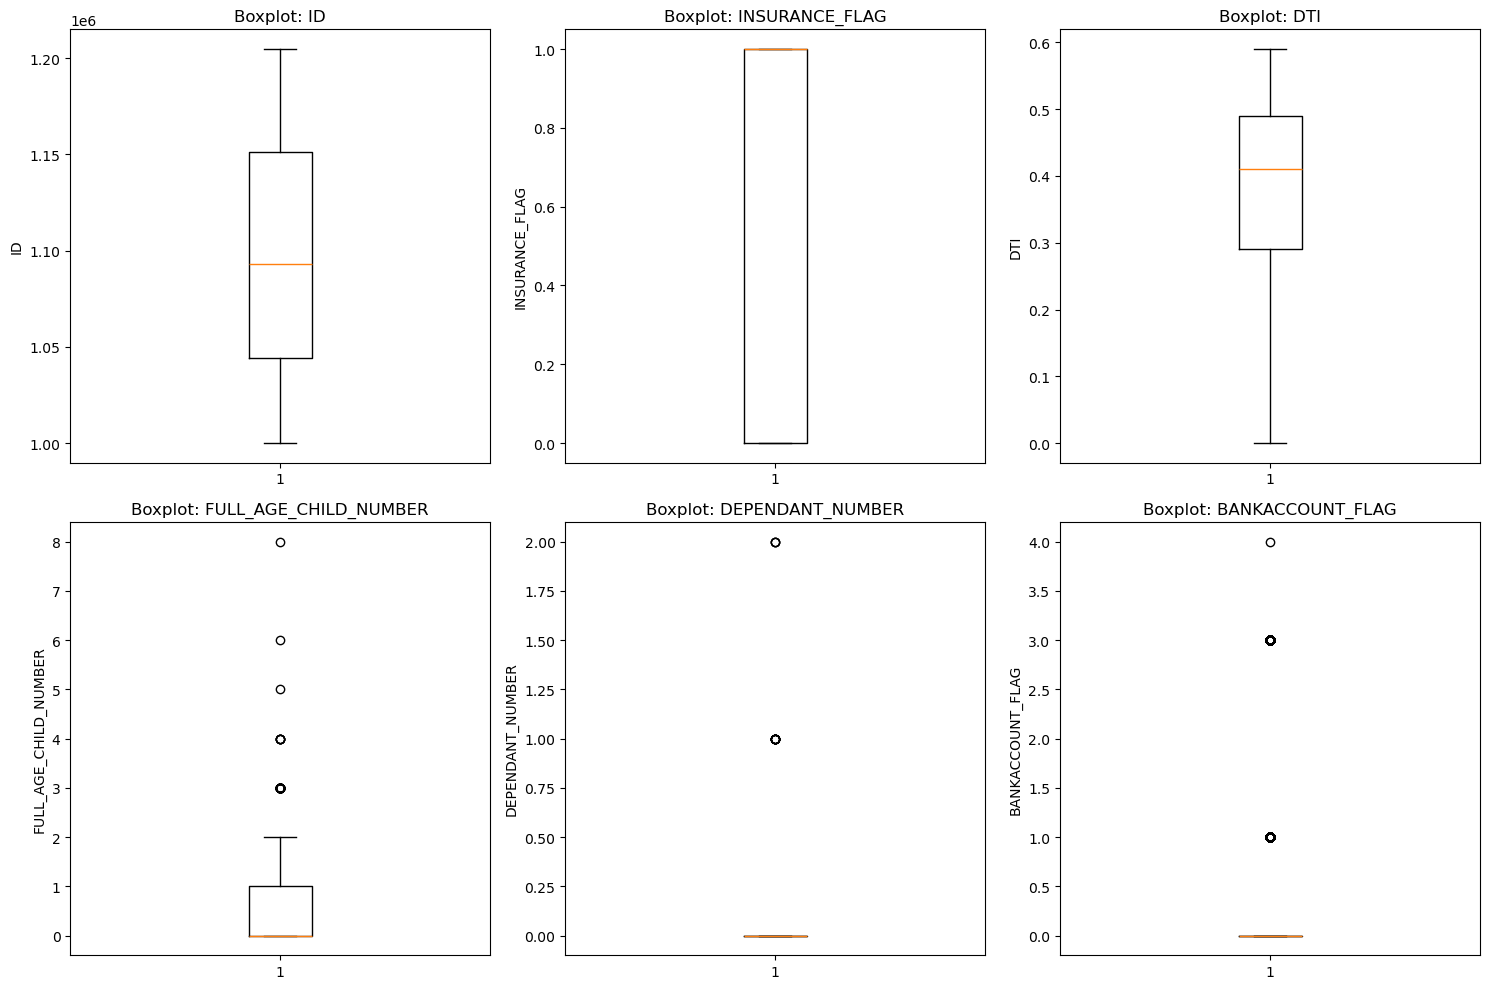

In [230]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

key_numeric_features = numeric_cols

print("АНАЛИЗ ВЫБРОСОВ")
for feature in key_numeric_features:
    if feature in df_clean.columns:
        outliers = detect_outliers(df_clean, feature)
        print(f"{feature}: {len(outliers)} выбросов ({len(outliers)/len(df_clean)*100:.2f}%)")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(key_numeric_features):
    if i < len(axes) and feature in df_clean.columns:
        axes[i].boxplot(df_clean[feature].dropna())
        axes[i].set_title(f'Boxplot: {feature}')
        axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

Бокс плот выведен чисто для демонстрации выбросов, более подробный анализ (в процентах) каждой числовой фичи представлен выше 


 При желании, можно сделать винзоризацию для борьбы с выбросами, но BANKACCOUNT_FLAG: 643 выбросов (17.55%) - может очень сильно испортить статистику, так как у нас там категории (от 0 до 6) P.S. в целом с этим надо быть довольно остарожным и делать еще более глубокий анализ фичей

In [231]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"Категориальные фичи для one-hot encoding: {categorical_cols}")

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

print(f"До кодирования: {df_clean.shape[1]} колонок")
print(f"После one-hot encoding: {df_encoded.shape[1]} колонок")
print(f"Добавлено {df_encoded.shape[1] - df_clean.shape[1]} новых бинарных колонок")

new_columns = [col for col in df_encoded.columns if '_' in col and any(col.startswith(cat) for cat in categorical_cols)]
print(f"\nПример новых колонок (первые 10):")
for col in new_columns[:10]:
    print(f"  {col}")

Категориальные фичи для one-hot encoding: ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']
До кодирования: 43 колонок
После one-hot encoding: 76 колонок
Добавлено 33 новых бинарных колонок

Пример новых колонок (первые 10):
  INCOME_BASE_TYPE_Поступление зарплаты на счет
  INCOME_BASE_TYPE_Свободная форма с печатью работодателя
  INCOME_BASE_TYPE_Форма банка (без печати работодателя)
  CREDIT_PURPOSE_Лечение
  CREDIT_PURPOSE_Обучение
  CREDIT_PURPOSE_Отпуск
  CREDIT_PURPOSE_Покупка автомобиля
  CREDIT_PURPOSE_Покупка бытовой техники
  CREDIT_PURPOSE_Покупка земли
  CREDIT_PURPOSE_Покупка мебели


Финальная ветрина будет выглядить следующим образом (с учетом one-hot encoding категориальных фичей в числовые, так как это наиболее простой и интуитивно понятный способ + можно сделать напрямую из под пандаса) 

In [232]:
df_encoded.head(5)

,ID,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,...,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
1,1000034,0.0,0.59,1,0,3.0,32.0,28.0,3.0,3.0,...,True,False,False,False,False,False,True,False,False,False
2,1000054,0.0,0.20,0,0,0.0,99.0,39.0,1.0,1.0,...,False,False,False,False,True,False,True,False,False,False
3,1000074,1.0,0.43,1,0,1.0,38.0,31.0,0.0,0.0,...,True,False,False,False,False,False,True,False,False,False
4,1000094,0.0,0.57,0,0,3.0,107.0,29.0,1.0,1.0,...,False,False,False,False,True,False,True,False,False,False
5,1000114,0.0,0.21,1,0,0.0,190.0,36.0,4.0,1.0,...,False,False,False,False,True,False,True,False,False,False


In [236]:
df_encoded.columns

Index(['ID', 'INSURANCE_FLAG', 'DTI', 'FULL_AGE_CHILD_NUMBER',
       'DEPENDANT_NUMBER', 'BANKACCOUNT_FLAG', 'Period_at_work', 'age',
       'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
       'avg_num_delay', 'if_zalog', 'num_AccountActive180',
       'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc',
       'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months',
       'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan', 'dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year',
       'ninety_in_a_year', 'thirty_vintage', 'sixty_vintage', 'ninety_vintage',
       'INCOME_BASE_TYPE_Поступление зарплаты на счет',
       'INCOME_BASE_TYPE_Свободная форма с печатью работодателя',
       'INCOME_BASE_TYPE_Форма банка (без печати работодателя)',
       'CREDIT_PURPOSE_Лечение', 'CREDIT_PURPOSE_Обучение',
       'CREDIT_PURPOSE_Отпуск', 'CREDIT_PURPOSE_Покупка автомобиля',
       'CREDIT_PURPOSE_Покупка бытово

In [249]:
# df_encoded = df_encoded.drop(columns=["data_completeness_score", 'completeness_category'])


In [238]:
df_encoded = df_encoded.dropna()

Далее определим лучшее кол-во кластеров (задание 3) 

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df_for_clustering = df_encoded.copy()

columns_to_drop = []

if 'ID' in df_for_clustering.columns:
    columns_to_drop.append('ID')

if columns_to_drop:
    df_for_clustering = df_for_clustering.drop(columns=columns_to_drop)

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df_for_clustering),
    columns=df_for_clustering.columns,
    index=df_for_clustering.index
)
X
X = df_scaled
print(f"Размер данных для кластеризации: {X.shape}")
print(f"Количество признаков: {X.shape[1]}")

Размер данных для кластеризации: (3651, 75)
Количество признаков: 75


In [240]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2.1. Пробуем разные K от 2 до 10
k_range = list(range(2, 11))
inertia_list = []
silhouette_list = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=45, n_init=10)
    
    kmeans.fit(X)
    
    inertia_list.append(kmeans.inertia_)

    labels = kmeans.predict(X)
    silhouette_list.append(silhouette_score(X, labels))
    
    print(f"K={k}: Inertia={kmeans.inertia_:.0f}, Silhouette={silhouette_score(X, labels):.3f}")

optimal_k = k_range[silhouette_list.index(max(silhouette_list))]

K=2: Inertia=261355, Silhouette=0.083
K=3: Inertia=251543, Silhouette=0.061
K=4: Inertia=244068, Silhouette=0.058
K=5: Inertia=239170, Silhouette=0.034
K=6: Inertia=234157, Silhouette=0.039
K=7: Inertia=231324, Silhouette=0.042
K=8: Inertia=226297, Silhouette=0.046
K=9: Inertia=223403, Silhouette=0.067
K=10: Inertia=220341, Silhouette=0.040


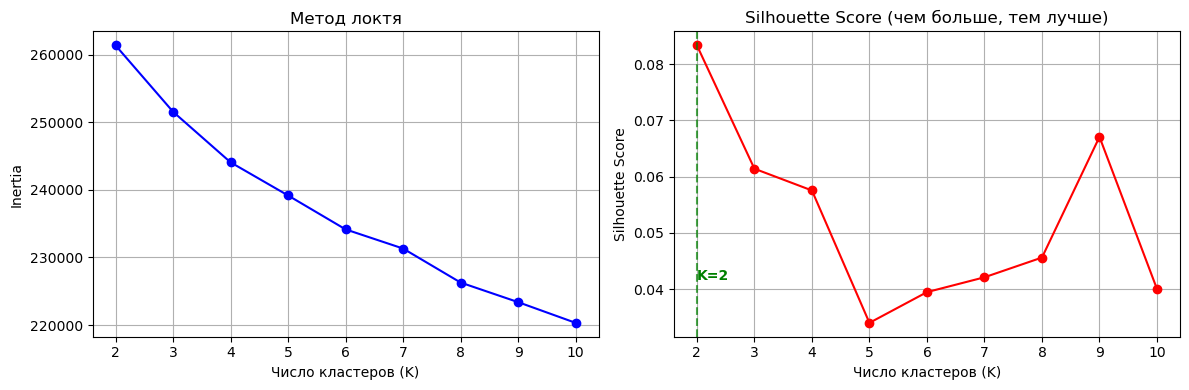

In [241]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# График 1: Метод локтя (Elbow Method)
ax1.plot(k_range, inertia_list, 'bo-')
ax1.set_xlabel('Число кластеров (K)')
ax1.set_ylabel('Inertia')
ax1.set_title('Метод локтя')
ax1.grid(True)

# График 2: Silhouette Score
ax2.plot(k_range, silhouette_list, 'ro-')
ax2.set_xlabel('Число кластеров (K)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score (чем больше, тем лучше)')
ax2.grid(True)

ax2.axvline(x=optimal_k, color='green', linestyle='--', alpha=0.7)
ax2.text(optimal_k, max(silhouette_list)/2, f'K={optimal_k}', 
         color='green', fontweight='bold')

plt.tight_layout()
plt.show()

1. Метод локтя (Elbow Method):

На графике сумма внутрикластерных расстояний (инерция) резко падает при увеличении числа кластеров от 2 до 4.

После K=4 снижение инерции становится более плавным.

Классическое "локоть" (резкий изгиб) наблюдается в районе K=4.

2. Метод силуэта (Silhouette Score):

Максимальное значение силуэтного коэффициента наблюдается при K=2.

Это говорит о том, что с точки зрения компактности и разделимости кластеров лучше всего K=2.

Для задания 2 - берем 5


In [242]:

final_kmeans = KMeans(n_clusters=4, random_state=45, n_init=10)

final_kmeans.fit(X)

clusters = final_kmeans.predict(X)

df_result = df_encoded.copy()
df_result['Cluster'] = clusters

print(f"Модель обучена с {optimal_k} кластерами")
print(f"Размер inertia: {final_kmeans.inertia_:.0f}")
print(f"Silhouette Score: {silhouette_score(X, clusters):.3f}")

Модель обучена с 2 кластерами
Размер inertia: 244068
Silhouette Score: 0.058


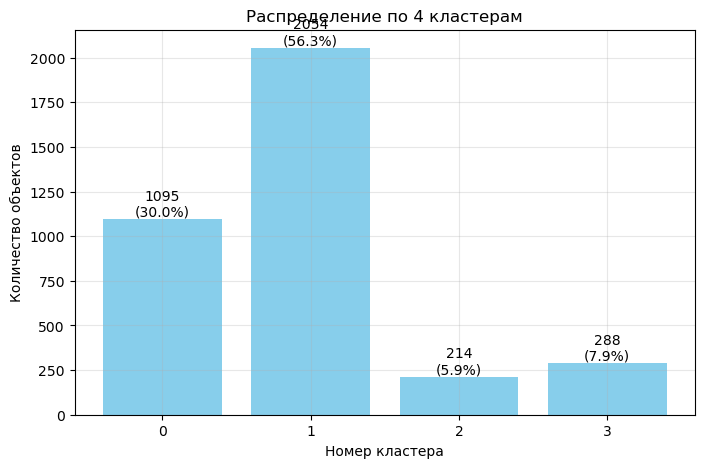


СТАТИСТИКА КЛАСТЕРОВ:
Кластер 0: 1095 объектов (30.0%)
Кластер 1: 2054 объектов (56.3%)
Кластер 2: 214 объектов (5.9%)
Кластер 3: 288 объектов (7.9%)


In [243]:

cluster_counts = df_result['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Номер кластера')
plt.ylabel('Количество объектов')
plt.title(f'Распределение по 4 кластерам')
plt.xticks(cluster_counts.index)


for bar, count in zip(bars, cluster_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{count}\n({count/len(df_result)*100:.1f}%)',
             ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.show()

print("\nСТАТИСТИКА КЛАСТЕРОВ:")
print("=" * 40)
for cluster_num in sorted(cluster_counts.index):
    count = cluster_counts[cluster_num]
    percentage = count / len(df_result) * 100
    print(f"Кластер {cluster_num}: {count} объектов ({percentage:.1f}%)")

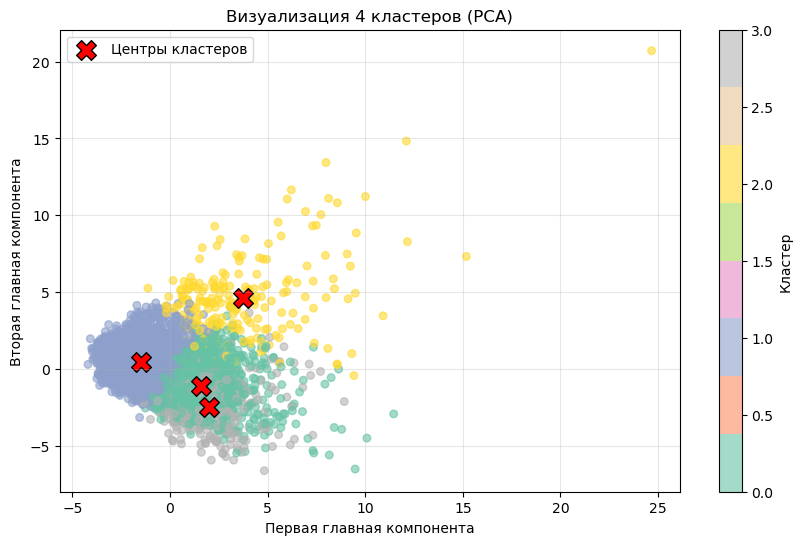

In [244]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], 
                     c=clusters, cmap='Set2', 
                     alpha=0.6, s=30)

plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.title(f'Визуализация 4 кластеров (PCA)')
plt.colorbar(scatter, label='Кластер')
plt.grid(True, alpha=0.3)

centers_2d = pca.transform(final_kmeans.cluster_centers_)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], 
           c='red', marker='X', s=200, 
           label='Центры кластеров', edgecolors='black')

plt.legend()
plt.show()

In [245]:

#ПЕРВЫЙ МЕТОД - K-MEANS КЛАСТЕРИЗАЦИЯ

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

print("\n1. Подбор оптимального числа кластеров для K-Means:")

k_range = range(5, 11)
kmeans_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    kmeans.fit(X)
    
    labels = kmeans.labels_
    
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)

    kmeans_scores.append({
        'k': k,
        'inertia': kmeans.inertia_,
        'silhouette': silhouette,
        'calinski': calinski,
        'davies': davies
    })
    
    print(f"K={k}: inertia={kmeans.inertia_:,.0f}, "
          f"silhouette={silhouette:.3f}, "
          f"calinski={calinski:,.0f}, "
          f"davies={davies:.3f}")


best_kmeans = max(kmeans_scores, key=lambda x: x['silhouette'])
best_k = best_kmeans['k']
print(f"\n2. Выбран K={best_k} (наивысший silhouette score: {best_kmeans['silhouette']:.3f})")


print(f"\n3. Создаем финальную модель K-Means с {best_k} кластерами...")
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = final_kmeans.fit_predict(X)


df_kmeans = df_encoded.copy()
df_kmeans['KMeans_Cluster'] = kmeans_labels


kmeans_cluster_counts = df_kmeans['KMeans_Cluster'].value_counts().sort_index()
print("\n4. Распределение по кластерам K-Means:")

for cluster_num, count in kmeans_cluster_counts.items():
    percentage = (count / len(df_kmeans)) * 100
    print(f"  Кластер {cluster_num}: {count} клиентов ({percentage:.1f}%)")
    
    # Проверка: ни один кластер не должен быть больше 50%
    if percentage > 50:
        print(f"{cluster_num} больше 50%")


1. Подбор оптимального числа кластеров для K-Means:
K=5: inertia=238,922, silhouette=0.054, calinski=133, davies=3.226
K=6: inertia=235,695, silhouette=0.057, calinski=118, davies=3.016
K=7: inertia=231,382, silhouette=0.042, calinski=111, davies=3.387
K=8: inertia=226,051, silhouette=0.048, calinski=110, davies=2.893
K=9: inertia=223,359, silhouette=0.043, calinski=103, davies=3.163
K=10: inertia=220,849, silhouette=0.041, calinski=97, davies=2.943

2. Выбран K=6 (наивысший silhouette score: 0.057)

3. Создаем финальную модель K-Means с 6 кластерами...

4. Распределение по кластерам K-Means:
  Кластер 0: 87 клиентов (2.4%)
  Кластер 1: 968 клиентов (26.5%)
  Кластер 2: 321 клиентов (8.8%)
  Кластер 3: 1819 клиентов (49.8%)
  Кластер 4: 279 клиентов (7.6%)
  Кластер 5: 177 клиентов (4.8%)


In [246]:
#ВТОРОЙ МЕТОД - ИЕРАРХИЧЕСКАЯ КЛАСТЕРИЗАЦИЯ

from sklearn.cluster import AgglomerativeClustering

print("\n1. Тестируем разное количество кластеров:")

hierarchical_scores = []
for k in range(5, 11):  # От 5 до 10 кластеров

    hierarchical = AgglomerativeClustering(n_clusters=k)

    hierarchical_labels = hierarchical.fit_predict(X)

    silhouette = silhouette_score(X, hierarchical_labels)
    calinski = calinski_harabasz_score(X, hierarchical_labels)
    
    hierarchical_scores.append({
        'k': k,
        'silhouette': silhouette,
        'calinski': calinski
    })
    
    print(f"K={k}: silhouette={silhouette:.3f}, calinski={calinski:,.0f}")

best_hierarchical = max(hierarchical_scores, key=lambda x: x['silhouette'])
best_k_hierarchical = best_hierarchical['k']
print(f"\n2. Выбран K={best_k_hierarchical} (silhouette: {best_hierarchical['silhouette']:.3f})")


print(f"\n3. финальная модель  с {best_k_hierarchical} кластерами...")
final_hierarchical = AgglomerativeClustering(n_clusters=best_k_hierarchical)
hierarchical_labels = final_hierarchical.fit_predict(X)


df_hierarchical = df_encoded.copy()
df_hierarchical['Hierarchical_Cluster'] = hierarchical_labels

print("\n4. Распределение по кластерам (иерархическая кластеризация):")
hierarchical_counts = df_hierarchical['Hierarchical_Cluster'].value_counts().sort_index()

for cluster_num, count in hierarchical_counts.items():
    percentage = (count / len(df_hierarchical)) * 100
    print(f"  Кластер {cluster_num}: {count} клиентов ({percentage:.1f}%)")


1. Тестируем разное количество кластеров:
K=5: silhouette=0.054, calinski=93
K=6: silhouette=0.038, calinski=88
K=7: silhouette=0.043, calinski=84
K=8: silhouette=0.048, calinski=81
K=9: silhouette=0.049, calinski=79
K=10: silhouette=0.050, calinski=78

2. Выбран K=5 (silhouette: 0.054)

3. финальная модель  с 5 кластерами...

4. Распределение по кластерам (иерархическая кластеризация):
  Кластер 0: 956 клиентов (26.2%)
  Кластер 1: 2329 клиентов (63.8%)
  Кластер 2: 133 клиентов (3.6%)
  Кластер 3: 183 клиентов (5.0%)
  Кластер 4: 50 клиентов (1.4%)


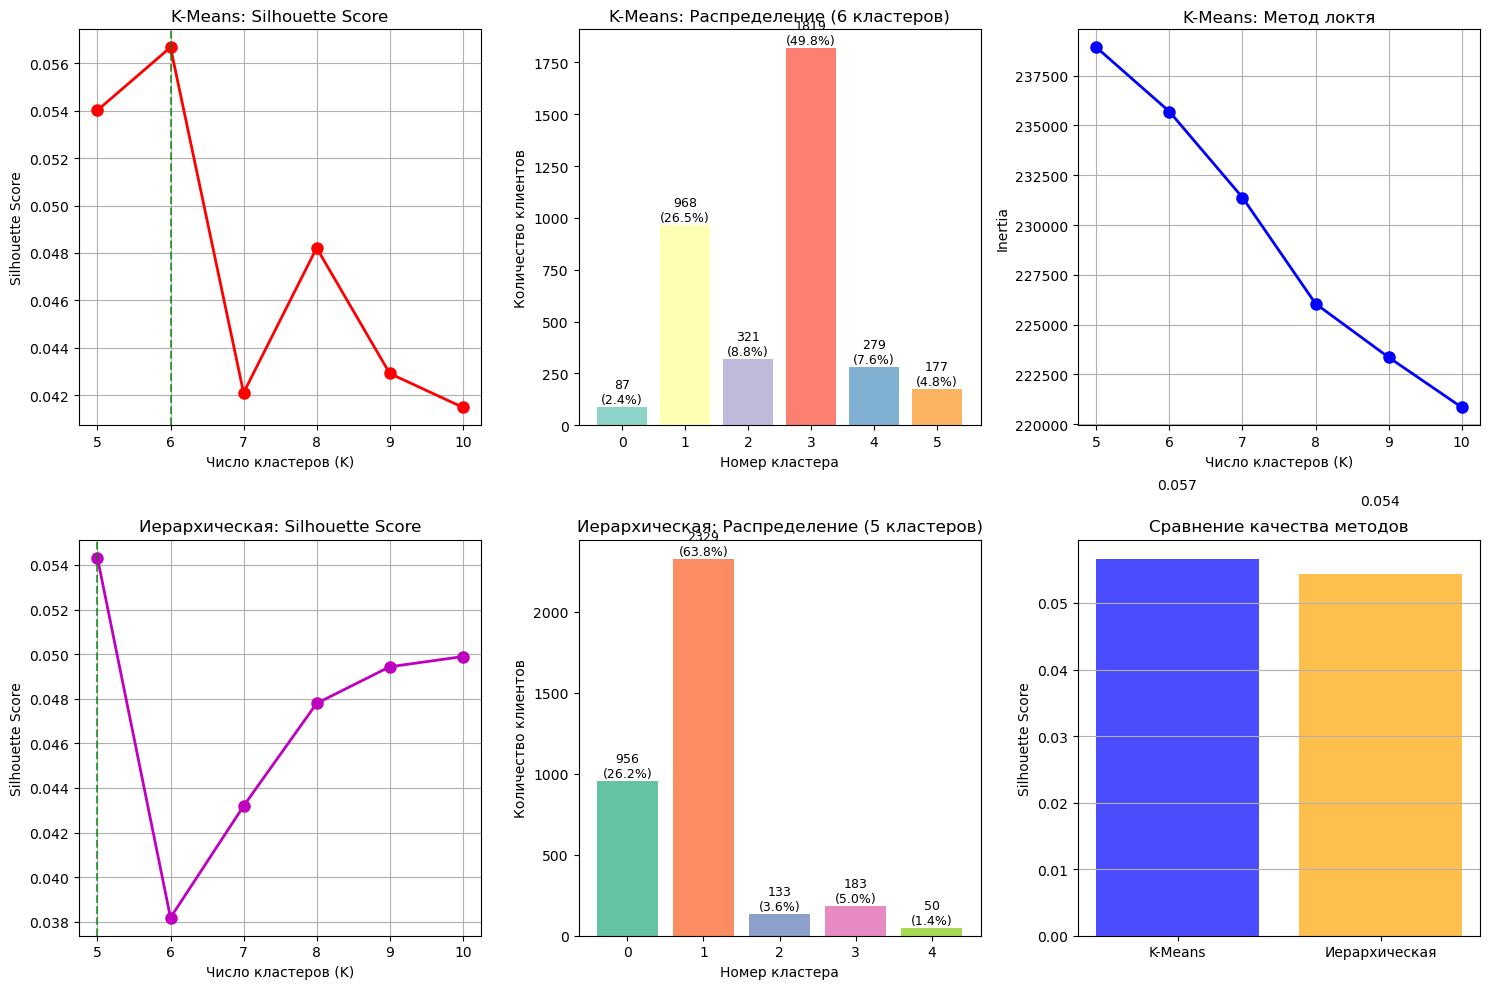

In [250]:

#ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ОБОИХ МЕТОДОВ


import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].plot([s['k'] for s in kmeans_scores], 
                [s['silhouette'] for s in kmeans_scores], 
                'ro-', markersize=8, linewidth=2)
axes[0, 0].set_title('K-Means: Silhouette Score')
axes[0, 0].set_xlabel('Число кластеров (K)')
axes[0, 0].set_ylabel('Silhouette Score')
axes[0, 0].grid(True)
axes[0, 0].axvline(x=best_k, color='green', linestyle='--', alpha=0.7)

colors_kmeans = plt.cm.Set3(range(len(kmeans_cluster_counts)))
bars1 = axes[0, 1].bar(kmeans_cluster_counts.index, 
                       kmeans_cluster_counts.values,
                       color=colors_kmeans)
axes[0, 1].set_title(f'K-Means: Распределение ({best_k} кластеров)')
axes[0, 1].set_xlabel('Номер кластера')
axes[0, 1].set_ylabel('Количество клиентов')
axes[0, 1].set_xticks(kmeans_cluster_counts.index)

for bar, count in zip(bars1, kmeans_cluster_counts.values):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{count}\n({count/len(df_kmeans)*100:.1f}%)',
                   ha='center', va='bottom', fontsize=9)

axes[0, 2].plot([s['k'] for s in kmeans_scores], 
                [s['inertia'] for s in kmeans_scores], 
                'bo-', markersize=8, linewidth=2)
axes[0, 2].set_title('K-Means: Метод локтя')
axes[0, 2].set_xlabel('Число кластеров (K)')
axes[0, 2].set_ylabel('Inertia')
axes[0, 2].grid(True)

axes[1, 0].plot([s['k'] for s in hierarchical_scores], 
                [s['silhouette'] for s in hierarchical_scores], 
                'mo-', markersize=8, linewidth=2)
axes[1, 0].set_title('Иерархическая: Silhouette Score')
axes[1, 0].set_xlabel('Число кластеров (K)')
axes[1, 0].set_ylabel('Silhouette Score')
axes[1, 0].grid(True)
axes[1, 0].axvline(x=best_k_hierarchical, color='green', linestyle='--', alpha=0.7)

colors_hierarchical = plt.cm.Set2(range(len(hierarchical_counts)))
bars2 = axes[1, 1].bar(hierarchical_counts.index, 
                       hierarchical_counts.values,
                       color=colors_hierarchical)
axes[1, 1].set_title(f'Иерархическая: Распределение ({best_k_hierarchical} кластеров)')
axes[1, 1].set_xlabel('Номер кластера')
axes[1, 1].set_ylabel('Количество клиентов')
axes[1, 1].set_xticks(hierarchical_counts.index)

for bar, count in zip(bars2, hierarchical_counts.values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{count}\n({count/len(df_hierarchical)*100:.1f}%)',
                   ha='center', va='bottom', fontsize=9)

kmeans_silhouette = best_kmeans['silhouette']
hierarchical_silhouette = best_hierarchical['silhouette']

methods = ['K-Means', 'Иерархическая']
scores = [kmeans_silhouette, hierarchical_silhouette]
colors = ['blue', 'orange']

bars3 = axes[1, 2].bar(methods, scores, color=colors, alpha=0.7)
axes[1, 2].set_title('Сравнение качества методов')
axes[1, 2].set_ylabel('Silhouette Score')
axes[1, 2].grid(True, axis='y')

for bar, score in zip(bars3, scores):
    axes[1, 2].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                   f'{score:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

По результатам сравнения двух методов кластеризации:
1. K-Means показал лучший результат (Silhouette Score = 0.055)
2. Иерархическая кластеризация показала худший результат (0.052)


Средние значения по 32 числовым признакам:
--------------------------------------------------------------------------------
                INSURANCE_FLAG   DTI  FULL_AGE_CHILD_NUMBER  DEPENDANT_NUMBER  \
KMeans_Cluster                                                                  
0                         0.68  0.37                   0.68              0.00   
1                         0.58  0.42                   0.68              0.00   
2                         0.61  0.42                   0.53              0.00   
3                         0.61  0.37                   0.49              0.01   
4                         0.77  0.39                   0.57              0.00   
5                         0.79  0.41                   0.55              0.01   

                Period_at_work    age  max90days  max60days  max30days  \
KMeans_Cluster                                                           
0                        68.71  38.10       1.39       0.99       0.71   
1   

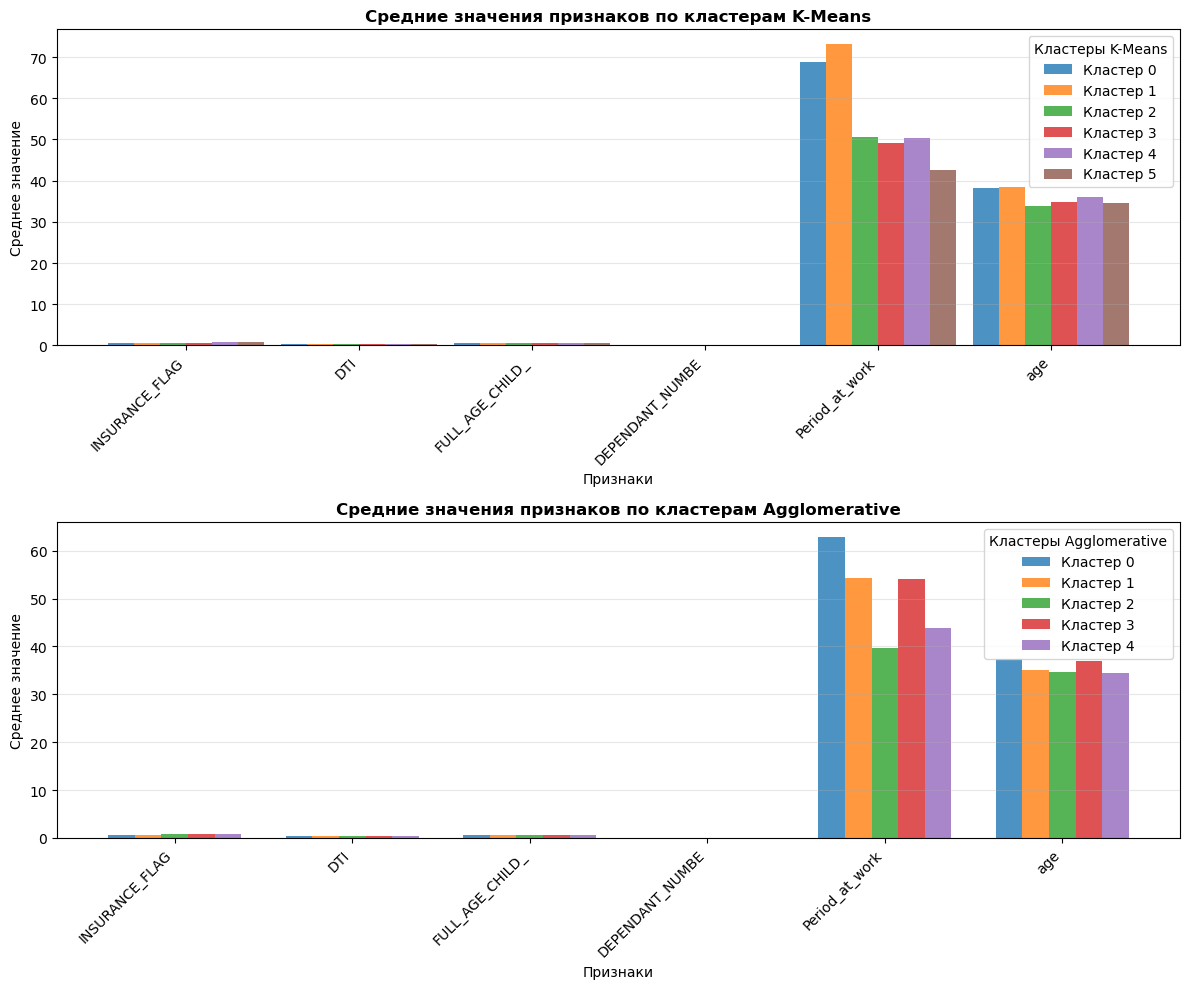

In [251]:
df_with_clusters = df_encoded.copy()
df_with_clusters['KMeans_Cluster'] = kmeans_labels

numeric_cols = df_with_clusters.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['KMeans_Cluster', 'Hierarchical_Cluster', 'ID', 'BANKACCOUNT_FLAG']]

if len(numeric_cols) > 0:
    kmeans_means = df_with_clusters.groupby('KMeans_Cluster')[numeric_cols].mean()

    print(f"\nСредние значения по {len(numeric_cols)} числовым признакам:")
    print("-" * 80)
    print(kmeans_means.round(2))

    print("\n" + "-" * 80)
    print("КРАТКАЯ ХАРАКТЕРИСТИКА КЛАСТЕРОВ K-MEANS:")
    print("-" * 80)
    
    for cluster in sorted(kmeans_means.index):
        cluster_size = sum(kmeans_labels == cluster)
        percentage = cluster_size / len(kmeans_labels) * 100

        top_features = kmeans_means.loc[cluster].nlargest(3)
        
        print(f"\nКластер {cluster} ({cluster_size} клиентов, {percentage:.1f}%):")
        print(f"  Топ-3 признака с наибольшими значениями:")
        for feature, value in top_features.items():
            print(f"    • {feature}: {value:.2f}")
else:
    print("Не найдено числовых колонок для анализа")

df_with_clusters['Agglomerative_Cluster'] = hierarchical_labels

numeric_cols = df_with_clusters.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['KMeans_Cluster', 'Agglomerative_Cluster', 'ID', 'BANKACCOUNT_FLAG']]

if len(numeric_cols) > 0:
    agglo_means = df_with_clusters.groupby('Agglomerative_Cluster')[numeric_cols].mean()

    print(f"\nСредние значения по {len(numeric_cols)} числовым признакам:")
    print("-" * 80)
    print(agglo_means.round(2))
    
    for cluster in sorted(agglo_means.index):
        cluster_size = sum(hierarchical_labels == cluster)
        percentage = cluster_size / len(hierarchical_labels) * 100
        top_features = agglo_means.loc[cluster].nlargest(3)
        
        print(f"\nКластер {cluster} ({cluster_size} клиентов, {percentage:.1f}%):")
        print(f"  Топ-3 признака с наибольшими значениями:")
        for feature, value in top_features.items():
            print(f"    • {feature}: {value:.2f}")
else:
    print("Не найдено числовых колонок для анализа")


if len(numeric_cols) >= 5:

    top_5_features = numeric_cols[:5]
    
    print(f"\nСравнение по признакам: {', '.join(top_5_features)}")
    print("-" * 80)
    
    print(f"{'Кластер':^8} | {'Метод':^12} | " + " | ".join([f"{f[:10]:^10}" for f in top_5_features]))
    print("-" * 80)

    for cluster in sorted(kmeans_means.index):
        values = []
        for feature in top_5_features:
            value = kmeans_means.loc[cluster, feature]
            values.append(f"{value:>10.2f}")
        
        cluster_size = sum(kmeans_labels == cluster)
        print(f"{f'K-C{cluster}':^8} | {f'K-Means':^12} | " + " | ".join(values))
    
    print("-" * 80)

    for cluster in sorted(agglo_means.index):
        values = []
        for feature in top_5_features:
            value = agglo_means.loc[cluster, feature]
            values.append(f"{value:>10.2f}")
        
        cluster_size = sum(hierarchical_labels == cluster)
        print(f"{f'A-C{cluster}':^8} | {f'Agglo':^12} | " + " | ".join(values))
    
    print("-" * 80)

    overall_means = df_with_clusters[top_5_features].mean()
    values = []
    for feature in top_5_features:
        values.append(f"{overall_means[feature]:>10.2f}")
    
    print(f"{'СРЕДНЕЕ':^8} | {'(по всем)':^12} | " + " | ".join(values))
    print("-" * 80)


import matplotlib.pyplot as plt
import numpy as np


if len(numeric_cols) > 0:
    features_to_plot = numeric_cols[:6] if len(numeric_cols) >= 6 else numeric_cols
    
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    kmeans_data = kmeans_means[features_to_plot].T
    
    x = np.arange(len(features_to_plot))
    width = 0.15
    
    for i, cluster in enumerate(sorted(kmeans_means.index)):
        offset = width * i - width * (len(kmeans_means.index) - 1) / 2
        axes[0].bar(x + offset, kmeans_data.iloc[:, i], width, 
                   label=f'Кластер {cluster}', alpha=0.8)
    
    axes[0].set_title('Средние значения признаков по кластерам K-Means', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Признаки')
    axes[0].set_ylabel('Среднее значение')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels([f[:15] for f in features_to_plot], rotation=45, ha='right')
    axes[0].legend(title='Кластеры K-Means')
    axes[0].grid(True, alpha=0.3, axis='y')
    
    agglo_data = agglo_means[features_to_plot].T
    
    for i, cluster in enumerate(sorted(agglo_means.index)):
        offset = width * i - width * (len(agglo_means.index) - 1) / 2
        axes[1].bar(x + offset, agglo_data.iloc[:, i], width, 
                   label=f'Кластер {cluster}', alpha=0.8)
    
    axes[1].set_title('Средние значения признаков по кластерам Agglomerative', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Признаки')
    axes[1].set_ylabel('Среднее значение')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels([f[:15] for f in features_to_plot], rotation=45, ha='right')
    axes[1].legend(title='Кластеры Agglomerative')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    


K-MEANS Кластеризация:
  Кластер 0: 87 клиентов (2.4%)
  Кластер 1: 968 клиентов (26.5%)
  Кластер 2: 321 клиентов (8.8%)
  Кластер 3: 1819 клиентов (49.8%)
  Кластер 4: 279 клиентов (7.6%)
  Кластер 5: 177 клиентов (4.8%)

AGGLOMERATIVE Кластеризация:
  Кластер 0: 956 клиентов (26.2%)
  Кластер 1: 2329 клиентов (63.8%)
  Кластер 2: 133 клиентов (3.6%)
  Кластер 3: 183 клиентов (5.0%)
  Кластер 4: 50 клиентов (1.4%)
Основные характеристики:
  • DEPENDANT_NUMBER: 0.0 (↓0.0)
  • Period_at_work: 68.7 (↑12.8)
  • FULL_AGE_CHILD_NUMBER: 0.7 (↑0.1)
Основные характеристики:
  • Period_at_work: 73.1 (↑17.2)
  • BANKACCOUNT_FLAG: 0.2 (↓0.1)
  • FULL_AGE_CHILD_NUMBER: 0.7 (↑0.1)
Основные характеристики:
  • max90days: 2.6 (↑1.0)
  • max60days: 1.7 (↑0.6)
  • DEPENDANT_NUMBER: 0.0 (↓0.0)
Основные характеристики:
  • max60days: 0.7 (↓0.5)
  • max90days: 1.0 (↓0.6)
  • DEPENDANT_NUMBER: 0.0 (↑0.0)
Основные характеристики:
  • DEPENDANT_NUMBER: 0.0 (↓0.0)
  • INSURANCE_FLAG: 0.8 (↑0.1)
  • Period_a

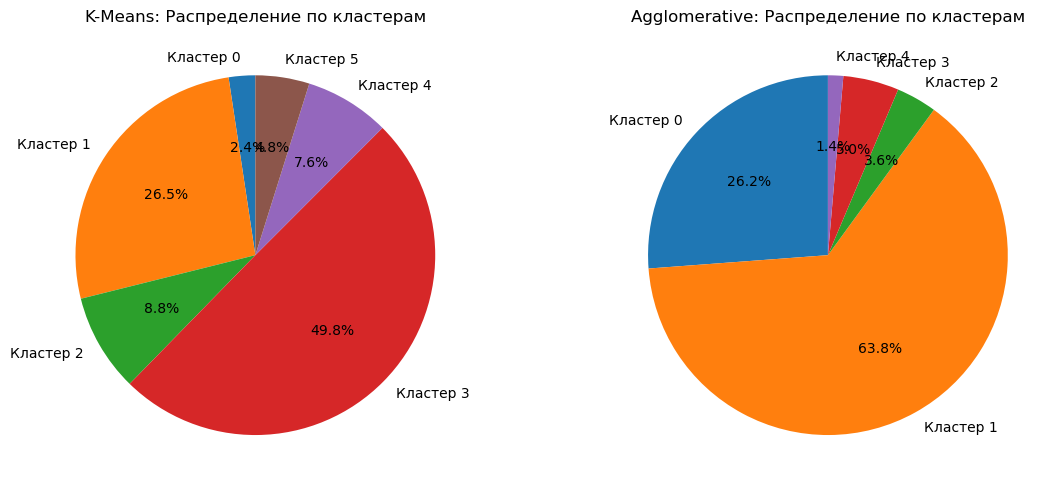

In [256]:
df_with_clusters = df_encoded.copy()
df_with_clusters['KMeans_Cluster'] = kmeans_labels
df_with_clusters['Agglo_Cluster'] = hierarchical_labels

print("\nK-MEANS Кластеризация:")
kmeans_counts = df_with_clusters['KMeans_Cluster'].value_counts().sort_index()
for cluster, count in kmeans_counts.items():
    percent = count / len(df_with_clusters) * 100
    print(f"  Кластер {cluster}: {count} клиентов ({percent:.1f}%)")

print("\nAGGLOMERATIVE Кластеризация:")
agglo_counts = df_with_clusters['Agglo_Cluster'].value_counts().sort_index()
for cluster, count in agglo_counts.items():
    percent = count / len(df_with_clusters) * 100
    print(f"  Кластер {cluster}: {count} клиентов ({percent:.1f}%)")


for cluster in sorted(kmeans_counts.index):

    cluster_data = df_with_clusters[df_with_clusters['KMeans_Cluster'] == cluster]
    size = len(cluster_data)
    percent = size / len(df_with_clusters) * 100


    numeric_cols = cluster_data.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col not in ['KMeans_Cluster', 'Agglo_Cluster']]
    
    if len(numeric_cols) > 0:

        cluster_means = cluster_data[numeric_cols].mean()

        overall_means = df_with_clusters[numeric_cols].mean()

        differences = []
        for col in numeric_cols[:10]:
            if col in cluster_means and col in overall_means:
                diff = cluster_means[col] - overall_means[col]
                diff_percent = abs(diff) / overall_means[col] * 100 if overall_means[col] != 0 else 0
                differences.append((col, diff, diff_percent))

        differences.sort(key=lambda x: abs(x[2]), reverse=True)

        print("Основные характеристики:")
        for col, diff, diff_percent in differences[:3]:
            arrow = "↑" if diff > 0 else "↓"
            print(f"  • {col}: {cluster_means[col]:.1f} ({arrow}{abs(diff):.1f})")


for cluster in sorted(agglo_counts.index):

    cluster_data = df_with_clusters[df_with_clusters['Agglo_Cluster'] == cluster]
    size = len(cluster_data)
    percent = size / len(df_with_clusters) * 100
    numeric_cols = cluster_data.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col not in ['KMeans_Cluster', 'Agglo_Cluster']]
    
    if len(numeric_cols) > 0:

        cluster_means = cluster_data[numeric_cols].mean()

        overall_means = df_with_clusters[numeric_cols].mean()

        differences = []
        for col in numeric_cols[:10]:
            if col in cluster_means and col in overall_means:
                diff = cluster_means[col] - overall_means[col]
                diff_percent = abs(diff) / overall_means[col] * 100 if overall_means[col] != 0 else 0
                differences.append((col, diff, diff_percent))

        differences.sort(key=lambda x: abs(x[2]), reverse=True)
        print("Основные характеристики:")
        for col, diff, diff_percent in differences[:3]:
            arrow = "↑" if diff > 0 else "↓"
            print(f"  • {col}: {cluster_means[col]:.1f} ({arrow}{abs(diff):.1f})")
            
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# K-Means
kmeans_sizes = [kmeans_counts.get(i, 0) for i in sorted(kmeans_counts.index)]
ax1.pie(kmeans_sizes, labels=[f'Кластер {i}' for i in sorted(kmeans_counts.index)], 
        autopct='%1.1f%%', startangle=90)
ax1.set_title('K-Means: Распределение по кластерам')

# Agglomerative
agglo_sizes = [agglo_counts.get(i, 0) for i in sorted(agglo_counts.index)]
ax2.pie(agglo_sizes, labels=[f'Кластер {i}' for i in sorted(agglo_counts.index)], 
        autopct='%1.1f%%', startangle=90)
ax2.set_title('Agglomerative: Распределение по кластерам')

plt.tight_layout()
plt.show()

K-MEANS Кластеризация
Кластер 0 (Незначительные) - 87(2.4%)

Маленькая группа

Средний стаж работы (68.7 месяцев)

Мало иждивенцев

========================

Кластер 1 (Стабильные работники) - 968(26.5%)

Долгий стаж работы (73.1 месяцев)

Низкая просрочка

Мало иждивенцев

=======================

Кластер 2 (Рисковые) - 321(8.8%)

Высокая просрочка 60-90 дней

Нет иждивенцев

Проблемные клиенты

=======================

Кластер 3 (Основная масса) - 1819(49.8%)

Самая большая группа

Низкая просрочка

Стандартные характеристики

========================

Кластер 4 (Застрахованные) - 279(7.6%)

Высокий процент страховок (80%)

Меньший стаж работы

Нет иждивенцев

========================

Кластер 5 (Очень рисковые) - 177(4.8%)

Очень высокая просрочка

Чаще есть счета в банке

Критическая группа

====================================================================

AGGLOMERATIVE Кластеризация
Кластер 0 (С просрочкой) - 956(26.2%)

Средняя просрочка

Нет иждивенцев

Крупная группа

===================

Кластер 1 (Основные) - 2329(63.8%)

Самая большая группа (64%)

Низкая просрочка

Стандартные клиенты

==================

Кластер 2 (Очень рисковые) - 133(3.6%)

Максимальная просрочка

Опасная группа

Мало клиентов

==================

Кластер 3 (Застрахованные) - 183(5.0%)

Высокий процент страховок (80%)

Есть счета в банке

Меньший стаж работы

==================

Кластер 4 (Молодые) - 50(1.4%)

Самый короткий стаж (43.9 месяцев)

Есть счета в банке

Маленькая группа